In [1]:
#从 booksforcharlie/stable-diffusion-inpainting 加载预训练模型

pretrained_model_name_or_path = "booksforcharlie/stable-diffusion-inpainting"

from diffusers import AutoencoderKL, UNet2DConditionModel
from diffusers.schedulers import DDPMScheduler
from PIL import Image
import matplotlib.pyplot as plt
from unet_adapter import adapt_unet_with_catvton_attn

vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")
unet = UNet2DConditionModel.from_pretrained(pretrained_model_name_or_path, subfolder="unet")   
noise_scheduler = DDPMScheduler.from_pretrained(pretrained_model_name_or_path, subfolder="scheduler")



Could not load bitsandbytes native library: libcusparse.so.12: cannot open shared object file: No such file or directory
Traceback (most recent call last):
  File "/home/nervld/miniconda3/envs/lora/lib/python3.10/site-packages/bitsandbytes/cextension.py", line 85, in <module>
    lib = get_native_library()
  File "/home/nervld/miniconda3/envs/lora/lib/python3.10/site-packages/bitsandbytes/cextension.py", line 72, in get_native_library
    dll = ct.cdll.LoadLibrary(str(binary_path))
  File "/home/nervld/miniconda3/envs/lora/lib/python3.10/ctypes/__init__.py", line 452, in LoadLibrary
    return self._dlltype(name)
  File "/home/nervld/miniconda3/envs/lora/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: libcusparse.so.12: cannot open shared object file: No such file or directory

CUDA Setup failed despite CUDA being available. Please run the following command to get more information:

python -m bitsandbytes

Inspect the outp

In [2]:
adapt_unet_with_catvton_attn(
    unet = unet,
    catvton_attn_path="/home/nervld/gitclone/diffusers/models/catvton_unet_attn",
    trainable_modules="attention"
)

成功加载catvton的attention权重


ModuleList(
  (0): Attention(
    (to_q): Linear(in_features=320, out_features=320, bias=False)
    (to_k): Linear(in_features=320, out_features=320, bias=False)
    (to_v): Linear(in_features=320, out_features=320, bias=False)
    (to_out): ModuleList(
      (0): Linear(in_features=320, out_features=320, bias=True)
      (1): Dropout(p=0.0, inplace=False)
    )
    (processor): AttnProcessor2_0()
  )
  (1-3): 3 x Linear(in_features=320, out_features=320, bias=False)
  (4): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
  (5): Linear(in_features=320, out_features=320, bias=True)
  (6): Dropout(p=0.0, inplace=False)
  (7): AttnProcessor2_0()
  (8): Attention(
    (to_q): Linear(in_features=320, out_features=320, bias=False)
    (to_k): Linear(in_features=320, out_features=320, bias=False)
    (to_v): Linear(in_features=320, out_features=320, bias=False)
    (to_out): ModuleList(
      (0): Linear(in_features=320, out_

100%|██████████| 50/50 [00:24<00:00,  2.02it/s]


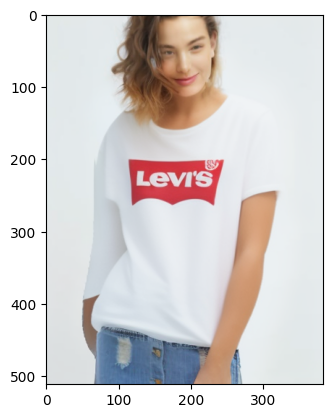

In [3]:
from catvton_base_infer import run_inference
# import sys
# del sys.modules['catvton_base_infer']
# from catvton_base_infer import run_inference
# 正常的CatVTON
real_image_path = "/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg"
real_mask_path = "/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg"
condition_image_path = "/home/nervld/gitclone/diffusers/data/catvton/condition_images/00000_00.jpg"

image = Image.open(real_image_path)
mask = Image.open(real_mask_path)
condition_image = Image.open(condition_image_path)

image = run_inference(unet, vae, noise_scheduler, image=image, mask=mask, condition_image=condition_image)
# 可视化
plt.imshow(image[0])
plt.show()

100%|██████████| 50/50 [00:25<00:00,  1.98it/s]


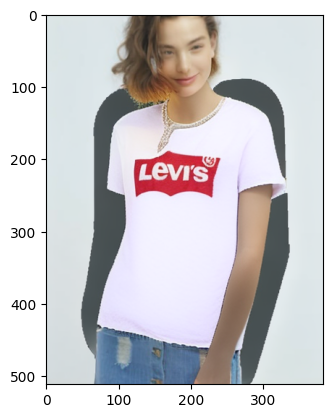

In [4]:
# 正常的CatVTON使用warped_masked_real_image
real_image_path = "/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg"
real_mask_path = "/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg"
condition_image_path = "/home/nervld/gitclone/diffusers/data/catvton/condition_images/00000_00.jpg"
cloth_warp_image_path = "/home/nervld/gitclone/diffusers/data/catvton/cloth_warp_images/00000_00.jpg"
cloth_warp_mask_path = "/home/nervld/gitclone/diffusers/data/catvton/cloth_warp_masks/00000_00.jpg"

image = Image.open(real_image_path)
mask = Image.open(real_mask_path)
condition_image = Image.open(condition_image_path)
cloth_warp_image = Image.open(cloth_warp_image_path)
cloth_warp_mask = Image.open(cloth_warp_mask_path)

image = run_inference(unet, vae, noise_scheduler, image=image, mask=mask, condition_image=condition_image, cloth_warp_image=cloth_warp_image, cloth_warp_mask=cloth_warp_mask)
# 可视化
plt.imshow(image[0])
plt.show()